# Análise de Componentes Principais com Kernel


## Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh


## Implementação de KPCA com kernel gaussiano


In [39]:
def kpca(X, gamma, variance_ratio_threshold):
    
    # Calculando as distâncias euclidianas quadradas para cada par de pontos no conjunto de dados MxN.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convertendo as distâncias de pares em uma matriz simétrica MxM.
    mat_sq_dists = squareform(sq_dists)

    # Calculando a matriz de kernel MxM usando o kernel RBF.
    K = np.exp(-gamma * mat_sq_dists)

    # Centralizando a matriz simétrica NxN de kernel.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtendo os autovalores em ordem decrescente com os autovetores correspondentes da matriz simétrica.
    eigvals, eigvecs = eigh(K_centered)

    # Invertendo os autovalores e autovetores para ficarem em ordem decrescente
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Calculando a razão de variância explicada
    explained_variance_ratio = eigvals / np.sum(eigvals)

    # Determinando quantos componentes principais manter
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    num_components = np.argmax(cumulative_variance_ratio >= variance_ratio_threshold) + 1

    # Selecionando os autovetores que correspondem aos num_components maiores autovalores.
    X_pc = np.column_stack([eigvecs[:, i] for i in range(num_components)])

    return X_pc, explained_variance_ratio[:num_components], num_components

## Toy example


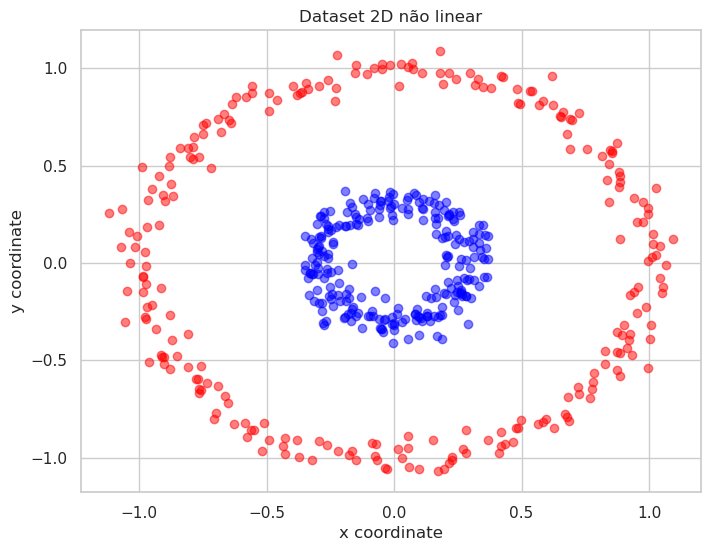

In [25]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=0)
plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('Dataset 2D não linear')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

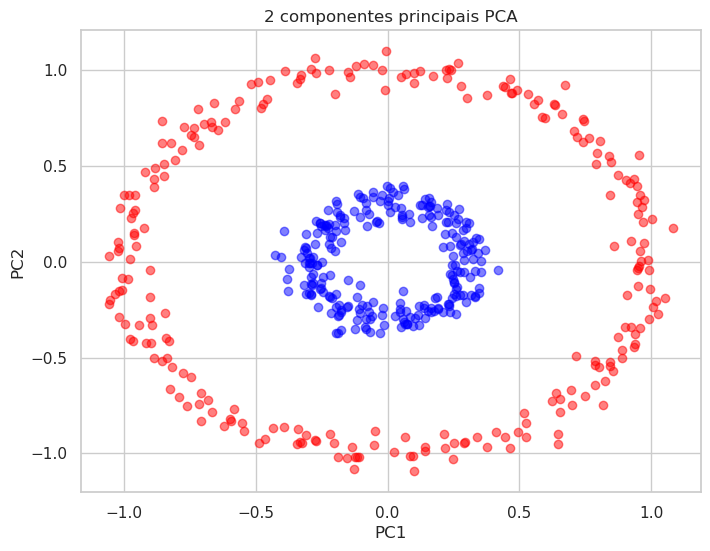

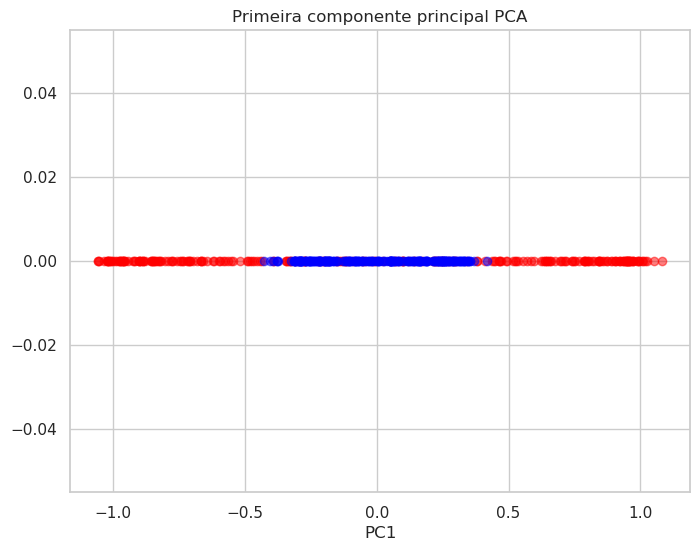

In [64]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)



plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5)

plt.title('2 componentes principais PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

scikit_pca = PCA(n_components=1)
X_pca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0][:500], np.zeros((X_pca[y==0, 0].shape[0],1)), color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0][:500], np.zeros((X_pca[y==1, 0].shape[0],1)), color='blue', alpha=0.5)

plt.title('Primeira componente principal PCA')
plt.xlabel('PC1')

plt.show()



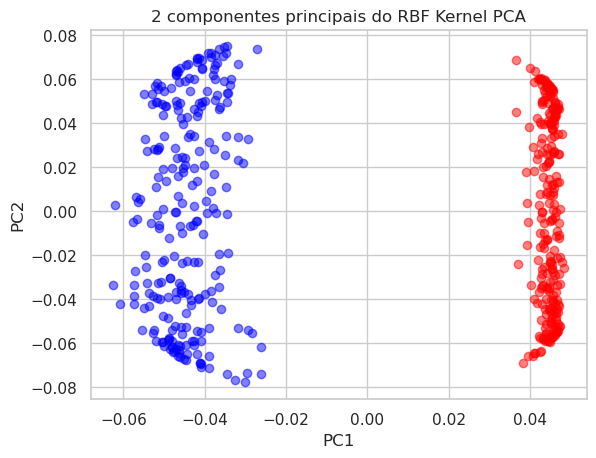

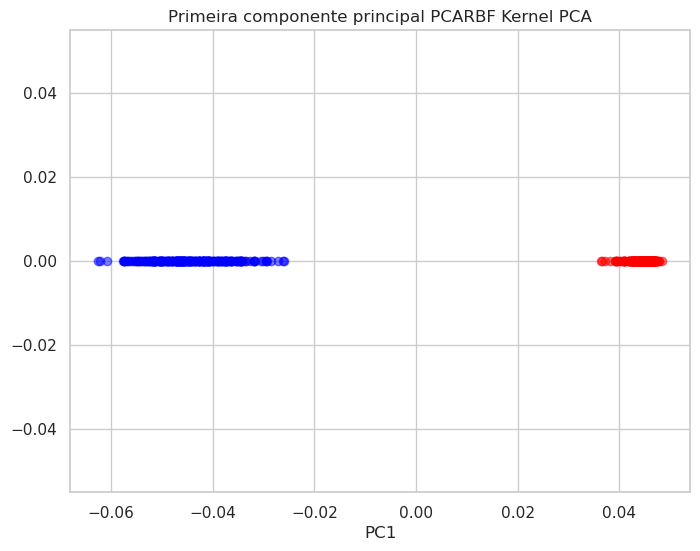

In [65]:
gamma = 3
variance_ratio_threshold = 0.95

X_pc, explained_variance_ratio, num_components = kpca(X, gamma, variance_ratio_threshold)

plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('2 componentes principais do RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((X_spca[y==0, 0].shape[0],1)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0],np.zeros((X_spca[y==1, 0].shape[0],1)), color='blue', alpha=0.5)

plt.title('Primeira componente principal PCARBF Kernel PCA')
plt.xlabel('PC1')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

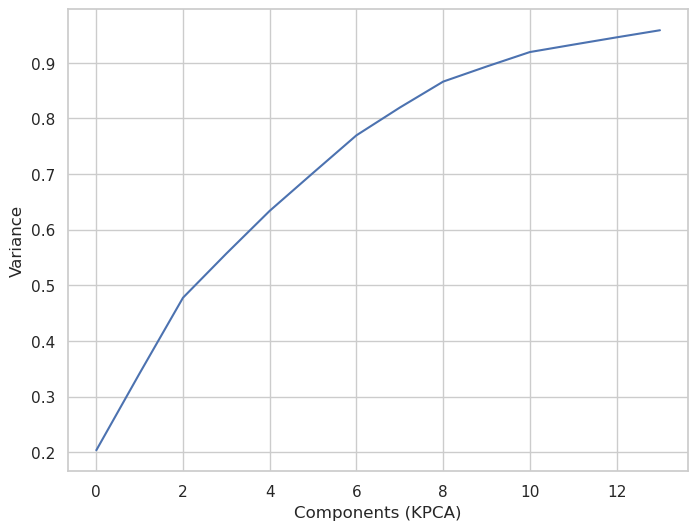

In [63]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.ylabel('Variance')
plt.xlabel('Components (KPCA)')
plt.show


## Kernel PCA em SVC

## Importando o dataset

In [2]:
from sklearn.datasets import load_breast_cancer

# Carregando o conjunto de dados de câncer de mama
cancer = load_breast_cancer()

# Convertendo os dados para um DataFrame do Pandas
dataset_cancer = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Adicionando a coluna 'label' com as classes alvo
dataset_cancer['label'] = cancer['target']

# Separando as features (X) e os rótulos (y)
X = dataset_cancer.iloc[:, :-1].values
y = dataset_cancer.iloc[:, -1].values

In [3]:
dataset_cancer.shape

(569, 31)

In [4]:
dataset_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Dividindo o dataset

In [5]:
# Dividindo os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature scaling

In [6]:
# Padronizando as features
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [7]:
# Mostrando a forma do conjunto de treino após a padronização
X_train.shape

(398, 30)

## Kernel PCA tunning

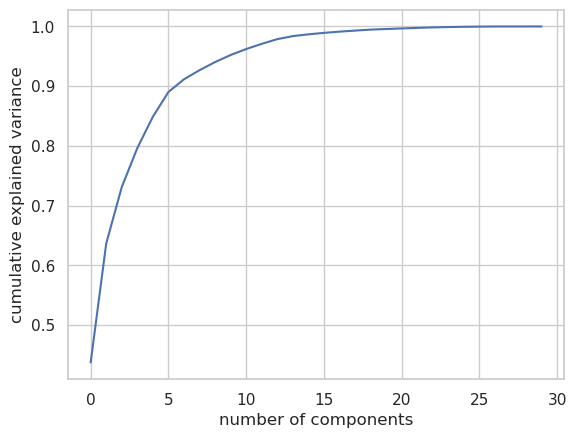

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.437092,0.437092
1,0.636343,0.199251
2,0.730949,0.094605
3,0.796232,0.065283
4,0.848763,0.052531
5,0.890165,0.041402
6,0.911469,0.021303
7,0.926725,0.015256
8,0.940273,0.013548
9,0.952169,0.011897


In [9]:
# Aplicando Kernel PCA para redução de dimensionalidade
from sklearn.decomposition import KernelPCA
kpca_test = KernelPCA()
kpca_test = kpca_test.fit_transform(X_train)

# Calculando a explained variance por cada componente
explained_variance = np.var(kpca_test, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plotando a explained variance cumulativa
sns.set(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

# Exibindo as primeiras 15 linhas do DataFrame com explained variance
evr = explained_variance_ratio
cvr = np.cumsum(explained_variance_ratio)

kpca_dataset_cancer = pd.DataFrame()
kpca_dataset_cancer['Cumulative Variance Ratio'] = cvr
kpca_dataset_cancer['Explained Variance Ratio'] = evr
display(kpca_dataset_cancer.head(15))

## KPCA tunned

In [10]:
# Reduzindo a dimensionalidade dos dados de treino e teste para 2 componentes
kpca = KernelPCA(n_components=2)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [11]:
X_train.shape

(398, 2)

## SVC hyperparameter tuning

In [12]:
# Importando SVC e GridSearchCV para otimização de hiperparâmetros
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
# Realizando a busca em grade com validação cruzada
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)
classifier = grid

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

In [13]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

## Predição usando o conjunto de teste do dataset


In [14]:
y_pred = grid.predict(X_test)

## Avaliação dos resultados com metricas de desempenho

In [15]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred), 4))
print('F1-Score:', np.round(metrics.f1_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[65  3]
 [ 5 98]]
Accuracy: 0.9532
Precision: 0.9703
Recall: 0.9515
F1-Score: 0.9608
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.97      0.95      0.96       103

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Visualisando o resultado do conjunto de treino

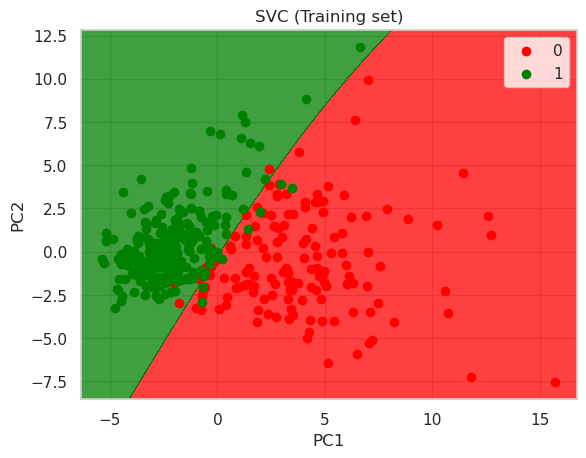

In [17]:
from matplotlib.colors import ListedColormap

# Preparando o conjunto de treino para visualização
X_set, y_set = X_train, y_train

# Criando uma grade de pontos para plotar a fronteira de decisão
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plotando a fronteira de decisão utilizando o classificador treinado
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['red', 'green']))

# Definindo os limites do gráfico
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotando os pontos de dados do conjunto de treino
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=['red', 'green'][i], label=j)

# Adicionando título e rótulos aos eixos
plt.title('SVC (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualisando o resultado no conjunto de teste

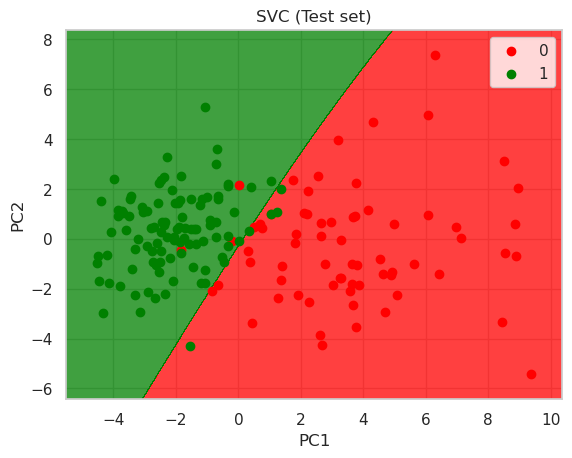

In [18]:
from matplotlib.colors import ListedColormap


# Preparando o conjunto de teste para visualização
X_set, y_set = X_test, y_test

# Criando uma grade de pontos para plotar a fronteira de decisão
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plotando a fronteira de decisão utilizando o classificador treinado
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['red', 'green']))

# Definindo os limites do gráfico
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotando os pontos de dados do conjunto de teste
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=['red', 'green'][i], label=j)

# Adicionando título e rótulos aos eixos
plt.title('SVC (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


# Implementando com outro dataset

## Importando o dataset

In [20]:
from sklearn.datasets import load_wine




# Carregando o conjunto de dados de vinho
wine = load_wine()

# Convertendo os dados para um DataFrame do Pandas
dataset_wine = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# Adicionando a coluna 'label' com as classes alvo
dataset_wine['label'] = wine['target']

# Separando as features (X) e os rótulos (y)
X = dataset_wine.iloc[:, :-1].values
y = dataset_wine.iloc[:, -1].values


In [21]:
dataset_wine.shape

(178, 14)

In [22]:
dataset_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Dividindo o dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Feature scaling

In [24]:
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [25]:
X_train.shape

(142, 13)

## KPCA Tunning

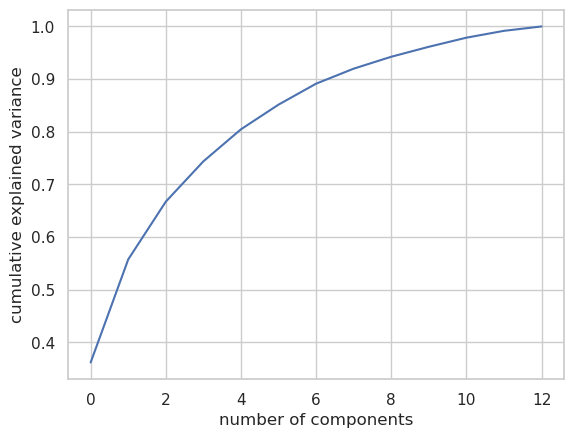

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.361866,0.361866
1,0.557619,0.195753
2,0.667281,0.109662
3,0.743842,0.076561
4,0.804681,0.060839
5,0.851544,0.046863
6,0.891345,0.039801
7,0.919847,0.028502
8,0.942452,0.022605
9,0.961388,0.018936


In [26]:
from sklearn.decomposition import KernelPCA
kpca_test = KernelPCA()
kpca_test = kpca_test.fit_transform(X_train)
explained_variance = np.var(kpca_test, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

sns.set(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = explained_variance_ratio
cvr = np.cumsum(explained_variance_ratio)

kpca_dataset_wine = pd.DataFrame()
kpca_dataset_wine['Cumulative Variance Ratio'] = cvr
kpca_dataset_wine['Explained Variance Ratio'] = evr
display(kpca_dataset_wine.head(15))

## KPCA Tunned

In [27]:
kpca = KernelPCA(n_components=2)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## SVC hyperparameter tuning

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)
classifier = grid

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

In [29]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

## Predição usando o conjunto de teste do dataset

In [30]:
y_pred = grid.predict(X_test)

## Avaliação dos resultados com metricas de desempenho

In [31]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## Visualisando o resultado no conjunto de treino

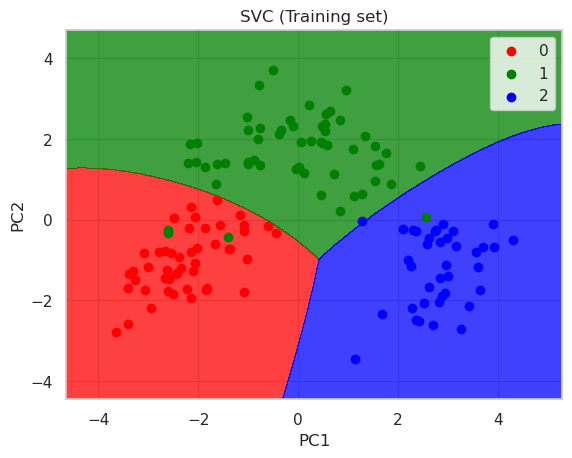

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=['red', 'green', 'blue'][i], label = j)
plt.title('SVC (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualisando o resultado no conjunto de teste

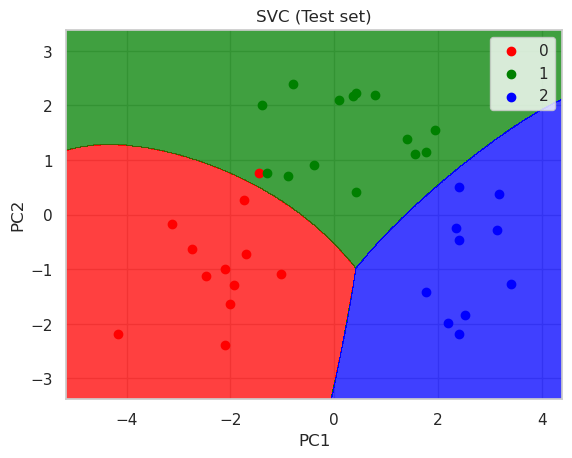

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=['red', 'green', 'blue'][i], label = j)
plt.title('SVC (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()